In [49]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load the data
def read_json_file(path):
    with open(path, 'r') as f:
        list_dict_alg = json.load(f)
    return list_dict_alg

path = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/pso_boxplot_red.json'
list_dict_alg = read_json_file(path)


In [51]:

def filter_limits(list_dict_alg, limit_fitness_calls, exec_time_limit):

    best_fitness_list = []
    avg_fitness_list = []
    df_list = []

    for dict_alg in list_dict_alg:
        # Encontra o indice do melhor indivíduo dentro dos limites estabelecidos
        best_ind_list = np.array(dict_alg['best_ind_list'])
        avg_ind_list = np.array(dict_alg['avg_ind_list'])
        fitness_calls_list = np.array(dict_alg['fitness_calls'])
        exec_time_list = np.array(dict_alg['exec_time_list'])
        total_time = dict_alg['total_time']

        mask = (fitness_calls_list <= limit_fitness_calls) & (exec_time_list <= exec_time_limit)

        best_ind_list = best_ind_list[mask]
        avg_ind_list = avg_ind_list[mask]
        fitness_calls_list = fitness_calls_list[mask]
        exec_time_list = exec_time_list[mask]

        #print(best_ind_list.shape)

        # Cria o dataframe
        df = pd.DataFrame(data={'best_ind': best_ind_list, 'avg_fitness': avg_ind_list, 'fitness_calls': fitness_calls_list, 'exec_time': exec_time_list})
        df['total_time'] = total_time
        df_list.append(df)

        # Encontra o melhor fitness do best_ind e seu respectivo fitness médio e adiciona as listas
        melhor_fitness = df['best_ind'].max()
        fitness_medio = df[df['best_ind'] == melhor_fitness]['avg_fitness'].values[0]

        best_fitness_list.append(melhor_fitness)
        avg_fitness_list.append(fitness_medio)
    
    return best_fitness_list, avg_fitness_list, df_list

best, avg, df_list = filter_limits(list_dict_alg, 100000, 100)
    

In [52]:
df_list[3]

,best_ind,avg_fitness,fitness_calls,exec_time,total_time
0,0.619207,0.457048,1.0,2.470838,109.414755
1,0.568701,0.381143,2.0,3.764564,109.414755
2,0.569987,0.384555,3.0,5.076181,109.414755
3,0.608117,0.510784,4.0,6.122644,109.414755
4,0.614621,0.530118,5.0,7.171023,109.414755
...,...,...,...,...,...
86,0.643244,0.606980,87.0,95.572905,109.414755
87,0.643244,0.588227,88.0,96.636007,109.414755
88,0.643244,0.596893,89.0,97.689036,109.414755
89,0.643244,0.591861,90.0,98.776862,109.414755


<Axes: >

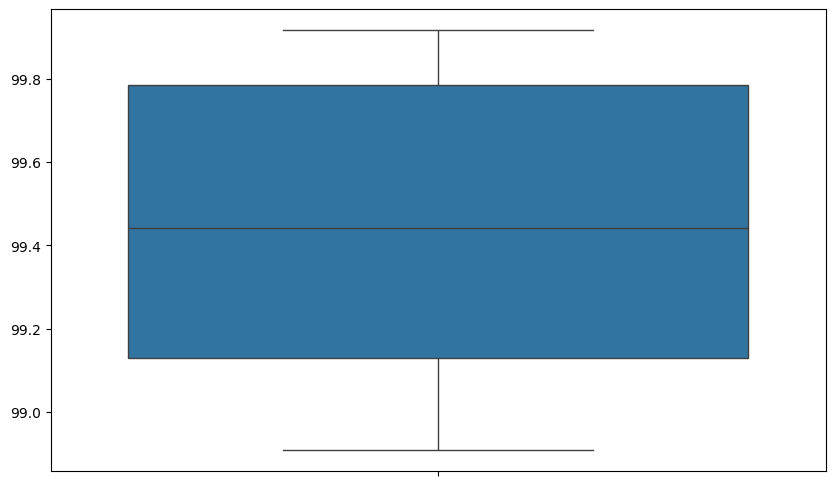

In [53]:
# Plota o boxplot de tempo de execucao
plt.figure(figsize=(10, 6))
data = [df['exec_time'].max() for df in df_list]
sns.boxplot(data=data)


In [54]:
def calc_all_boxplot(limit_fitness_calss=np.inf,exec_time_limit = np.inf):
    path_pso = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/pso_boxplot_red.json'
    path_de = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/de_boxplot_red.json'
    path_depso = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/depso_boxplot_red.json'
    path_cmaes = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/cmaes_boxplot_red.json'
    path_optainet = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/optainet_boxplot.json'

    list_dict_alg_pso = read_json_file(path_pso)
    list_dict_alg_de = read_json_file(path_de)
    list_dict_alg_depso = read_json_file(path_depso)
    list_dict_alg_cmaes = read_json_file(path_cmaes)
    list_dict_alg_optainet = read_json_file(path_optainet)

    best_pso, avg_pso, df_list_pso = filter_limits(list_dict_alg_pso, limit_fitness_calss, exec_time_limit)
    best_de, avg_de, df_list_de = filter_limits(list_dict_alg_de, limit_fitness_calss, exec_time_limit)
    best_depso, avg_depso, df_list_depso = filter_limits(list_dict_alg_depso, limit_fitness_calss, exec_time_limit)
    best_cmaes, avg_cmaes, df_list_cmaes = filter_limits(list_dict_alg_cmaes, limit_fitness_calss, exec_time_limit)
    best_optainet, avg_optainet, df_list_cmaes = filter_limits(list_dict_alg_optainet, limit_fitness_calss * 1000, exec_time_limit)


    best_pso.sort()
    best_de.sort()
    best_depso.sort()
    best_cmaes.sort()
    best_optainet.sort()


    # # Filtra as 10 melhores execucoes
    # best_pso = best_pso[:10]
    # best_de = best_de[:10]
    # best_depso = best_depso[:10]
    # best_cmaes = best_cmaes[:10]

    #best_optainet, avg_optainet, df_list_optainet = filter_limits(list_dict_alg_optainet, 1000 * limit_fitness_calss, exec_time_limit)

    # # Printa tudo no mesmo boxplot utilizanod sns
    # df = pd.DataFrame(data, index=['PSO', 'DE', 'DEPSO', 'CMAES']).T
    # sns.boxplot(data=df)
    # plt.title('Best Fitness')
    # plt.show()

    # df = pd.DataFrame(data, index=['PSO', 'DE', 'DEPSO', 'CMAES']).T
    # sns.boxplot(data=df)
    # plt.title('Avg Fitness')
    # plt.show()



    # Plotando tudo na mesma figura, lado a lado
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=100)

    # Melhor fitness
    data = [best_pso, best_de, best_depso, best_cmaes, best_optainet]
    df = pd.DataFrame(data, index=['PSO', 'DE', 'DEPSO', 'CMAES', 'OPTAINET']).T
    sns.boxplot(data=df, ax=axs[0])
    axs[0].set_title('Comparação de Melhor Fitness')
    axs[0].set_ylabel('Melhor Fitness')
    axs[0].set_xlabel('Algoritmo')
    axs[0].grid(True)

    # Fitness médio
    data = [avg_pso, avg_de, avg_depso, avg_cmaes, avg_optainet]
    df = pd.DataFrame(data, index=['PSO', 'DE', 'DEPSO', 'CMAES', 'OPTAINET']).T
    sns.boxplot(data=df, ax=axs[1])
    axs[1].set_title('Comparação de Fitness Médio')
    axs[1].set_ylabel('Fitness Médio')
    axs[1].set_xlabel('Algoritmo')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()




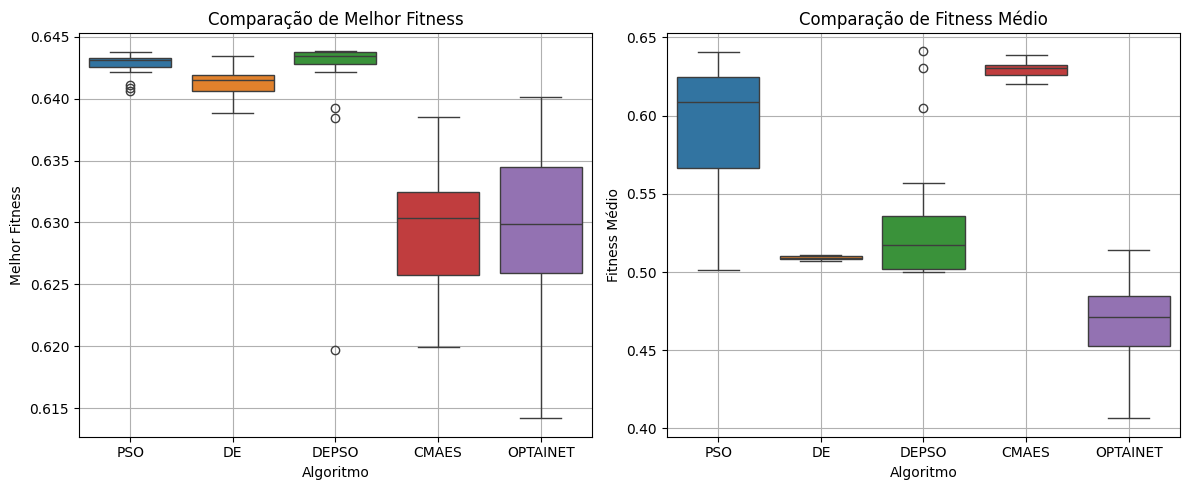

In [55]:
calc_all_boxplot()



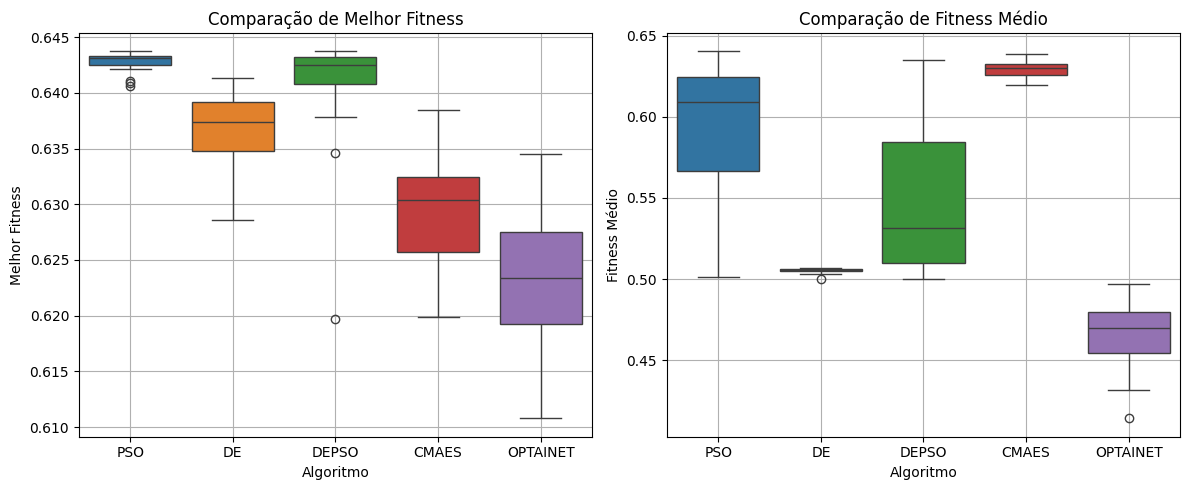

In [56]:
calc_all_boxplot(limit_fitness_calss=100, exec_time_limit=np.inf)


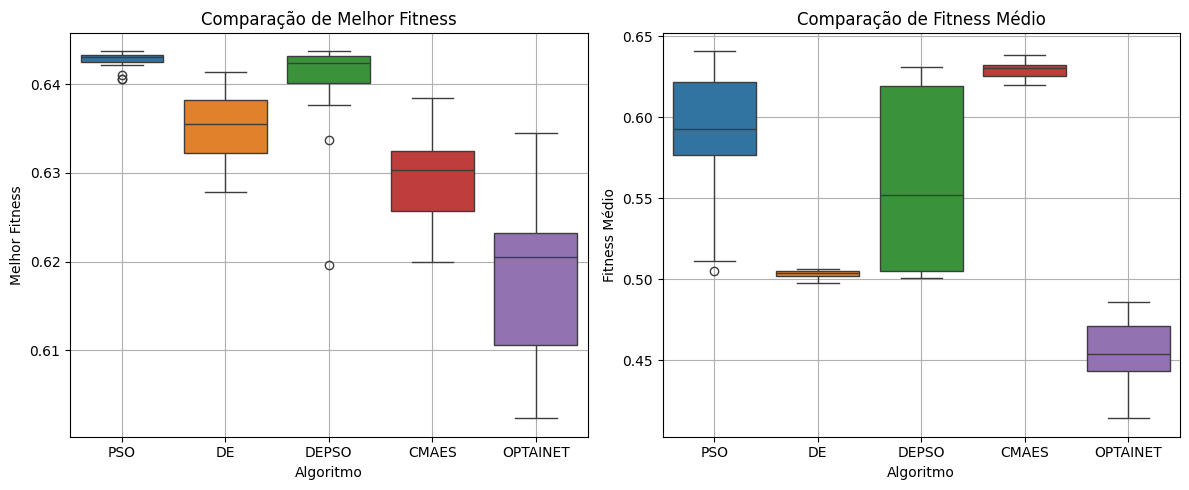

In [57]:
calc_all_boxplot(limit_fitness_calss=np.inf, exec_time_limit=100)


In [58]:
path_optainet = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/optainet_boxplot_red.json'

list_dict_alg_optainet = read_json_file(path_optainet)


# best_pso, avg_pso = filter_limits(list_dict_alg_pso, limit_fitness_calss, exec_time_limit)
# best_de, avg_de = filter_limits(list_dict_alg_de, limit_fitness_calss, exec_time_limit)
# best_depso, avg_depso = filter_limits(list_dict_alg_depso, limit_fitness_calss, exec_time_limit)
# best_cmaes, avg_cmaes = filter_limits(list_dict_alg_cmaes, limit_fitness_calss, exec_time_limit)
# best_optainet, avg_optainet = filter_limits(list_dict_alg_optainet, limit_fitness_calss, exec_time_limit)


In [59]:
list_dict_alg_optainet.keys()

AttributeError: 'list' object has no attribute 'keys'

In [ ]:
list_dict_alg_optainet[3].keys()
best_optainet, avg_optainet = filter_limits(list_dict_alg_optainet, np.inf, np.inf)


ValueError: too many values to unpack (expected 2)

In [ ]:
best_optainet

[0.6664022476673515,
 0.6669653957710641,
 0.6740484413314731,
 0.6657813724738753,
 0.6757946540208869,
 0.6669707055418603,
 0.6732666233494465,
 0.6604144113549955,
 0.6547924050114999,
 0.6786428273075512,
 0.661376665546467,
 0.6748631348796817,
 0.667523123258452,
 0.6599084185685131,
 0.6689276182390798,
 0.6704349023549999,
 0.6647782640651637,
 0.6532392257549413,
 0.6640071640533178,
 0.6626099131578368]

In [ ]:
path_pso = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/pso_boxplot_red.json'
path_de = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/de_boxplot_red.json'
path_depso = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/depso_boxplot_red.json'
path_cmaes = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/cmaes_boxplot_red.json'
path_optainet = '/home/ubuntu/Mestrado/modelo_foguete_corrigido/train_comparsion/results/optainet_boxplot_red.json'

list_dict_alg_pso = read_json_file(path_pso)
list_dict_alg_de = read_json_file(path_de)
list_dict_alg_depso = read_json_file(path_depso)
list_dict_alg_cmaes = read_json_file(path_cmaes)
#list_dict_alg_optainet = read_json_file(path_optainet)

best_depso, avg_depso, df_list_depso = filter_limits(list_dict_alg_depso, np.inf, np.inf)


In [ ]:
np.array(best_depso).argmax()

1